# Data prep

### 0. Set up Kaggle API credentials
1. Go to Kaggle.
2. Click on your profile picture, select Account, then scroll down to API.
3. Click Create New API Token. This will download a kaggle.json file containing your username and API key.

In [1]:
!pip install kaggle


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [7]:
!mkdir -p ~/.kaggle

4. Put your API key in ~/.kaggle/kaggle.json

In [9]:
!chmod 600 ~/.kaggle/kaggle.json

### 1. Download data from Kaggle

In [13]:
!kaggle datasets download -d gopalbhattrai/pascal-voc-2012-dataset -p ../data/pascal_voc_2012 --unzip

Dataset URL: https://www.kaggle.com/datasets/gopalbhattrai/pascal-voc-2012-dataset
License(s): unknown
100%|██████████████████████████████████████| 3.52G/3.52G [07:15<00:00, 8.81MB/s]
100%|██████████████████████████████████████| 3.52G/3.52G [07:15<00:00, 8.69MB/s]


In [1]:
!kaggle datasets download -d alincijov/penn-fudan -p ../data/penn_fudan --unzip

Dataset URL: https://www.kaggle.com/datasets/alincijov/penn-fudan
License(s): CC0-1.0
 99%|█████████████████████████████████████▊| 51.0M/51.3M [00:05<00:00, 11.9MB/s]
100%|██████████████████████████████████████| 51.3M/51.3M [00:05<00:00, 9.80MB/s]


### 2. First data prep

In [45]:
import os
import xml.etree.ElementTree as ET
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import random

In [35]:
images_path = "../data/pascal_voc_2012/VOC2012_train_val/VOC2012_train_val/JPEGImages"
annotations_path = "../data/pascal_voc_2012/VOC2012_train_val/VOC2012_train_val/Annotations"

classes=['aeroplane', 'bicycle', 'bird', 'boat', 'bottle',
         'bus', 'car', 'cat', 'chair', 'cow', 'diningtable',
         'dog', 'horse', 'motorbike', 'person', 'pottedplant',
         'sheep', 'sofa', 'train', 'tvmonitor']

In [40]:
def get_boxes_and_labels_from_xml(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    boxes_labels = []
    
    for obj in root.findall("object"):
        label = obj.find("name").text
        bndbox = obj.find("bndbox")
        box = (
            int(bndbox.find("xmin").text),
            int(bndbox.find("ymin").text),
            int(bndbox.find("xmax").text),
            int(bndbox.find("ymax").text),
        )
        boxes_labels.append((box, label))
    
    return boxes_labels

def draw_boxes_with_labels(image_path, boxes_labels):
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    try:
        font = ImageFont.truetype("arial.ttf", 24)
    except IOError:
        font = ImageFont.load_default()
    
    for box, label in boxes_labels:
        draw.rectangle(box, outline="red", width=2)
        text_position = (box[0], box[1] - 15)
        draw.text(text_position, label, fill="red", font=font)
    
    plt.imshow(image)
    plt.axis("off")
    plt.show()

In [41]:
image_name = "2007_000027"
image_path = os.path.join(images_path, f"{image_name}.jpg")
xml_path = os.path.join(annotations_path, f"{image_name}.xml")

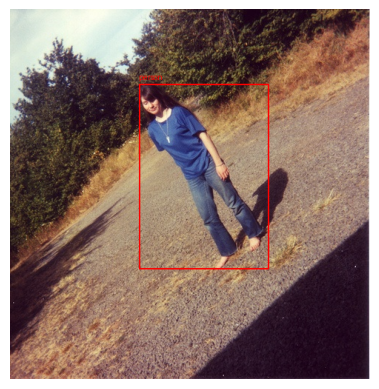

In [42]:
boxes_labels = get_boxes_and_labels_from_xml(xml_path)
draw_boxes_with_labels(image_path, boxes_labels)

In [49]:
person_images = []

for xml_file in os.listdir(annotations_path):
    if xml_file.endswith(".xml"):
        xml_path = os.path.join(annotations_path, xml_file)
        
        tree = ET.parse(xml_path)
        root = tree.getroot()
        
        contains_person = False
        for obj in root.findall("object"):
            label = obj.find("name").text
            if label == "person":
                contains_person = True
                break
        
        if contains_person:
            person_images.append(xml_file.replace(".xml", ".jpg"))

person_count = len(person_images)

print(person_count)

9583


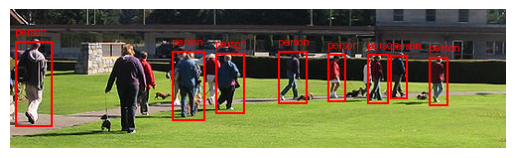

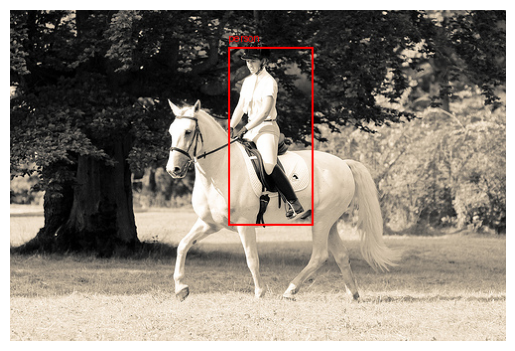

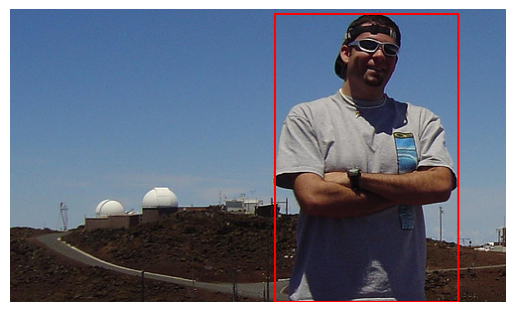

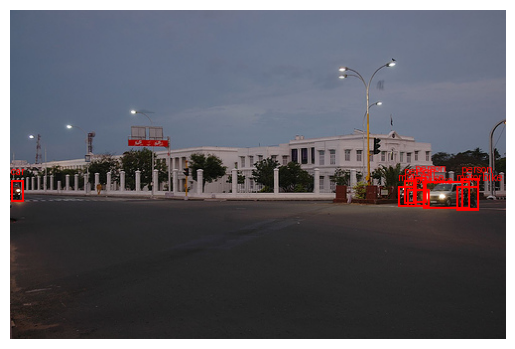

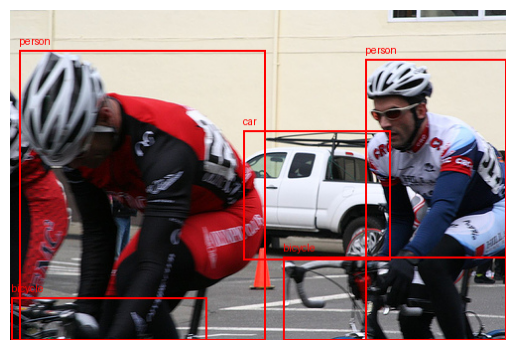

In [48]:
num_random_images = 5
random_images = random.sample(person_images, min(num_random_images, person_count))

for image_name in random_images:
    image_path = os.path.join(images_path, image_name)
    xml_path = os.path.join(annotations_path, image_name.replace(".jpg", ".xml"))
    
    boxes_labels = get_boxes_and_labels_from_xml(xml_path)
    draw_boxes_with_labels(image_path, boxes_labels)